<a href="https://colab.research.google.com/github/LalithaJanneti/KMeans_Clustering1/blob/main/KMeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

In [3]:
data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


visualization

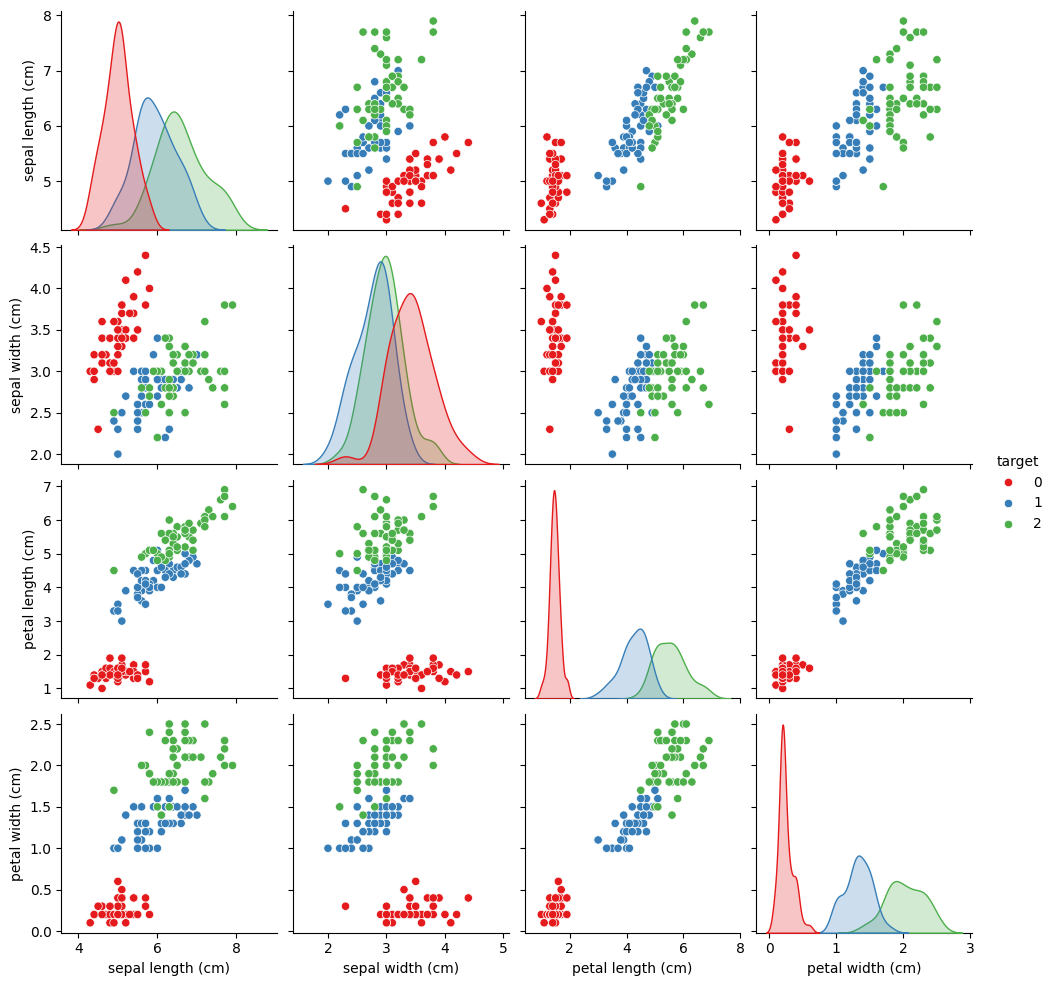

In [6]:
sns.pairplot(df,hue='target',palette="Set1")
plt.show()

data cleaning and preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler
#seperate features amd target
x=df.drop('target',axis=1)
y=df['target']
#scale the features
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

#check the scale data
print(x_scaled[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


Model building (K-means Clustering)

cluster-center: [[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


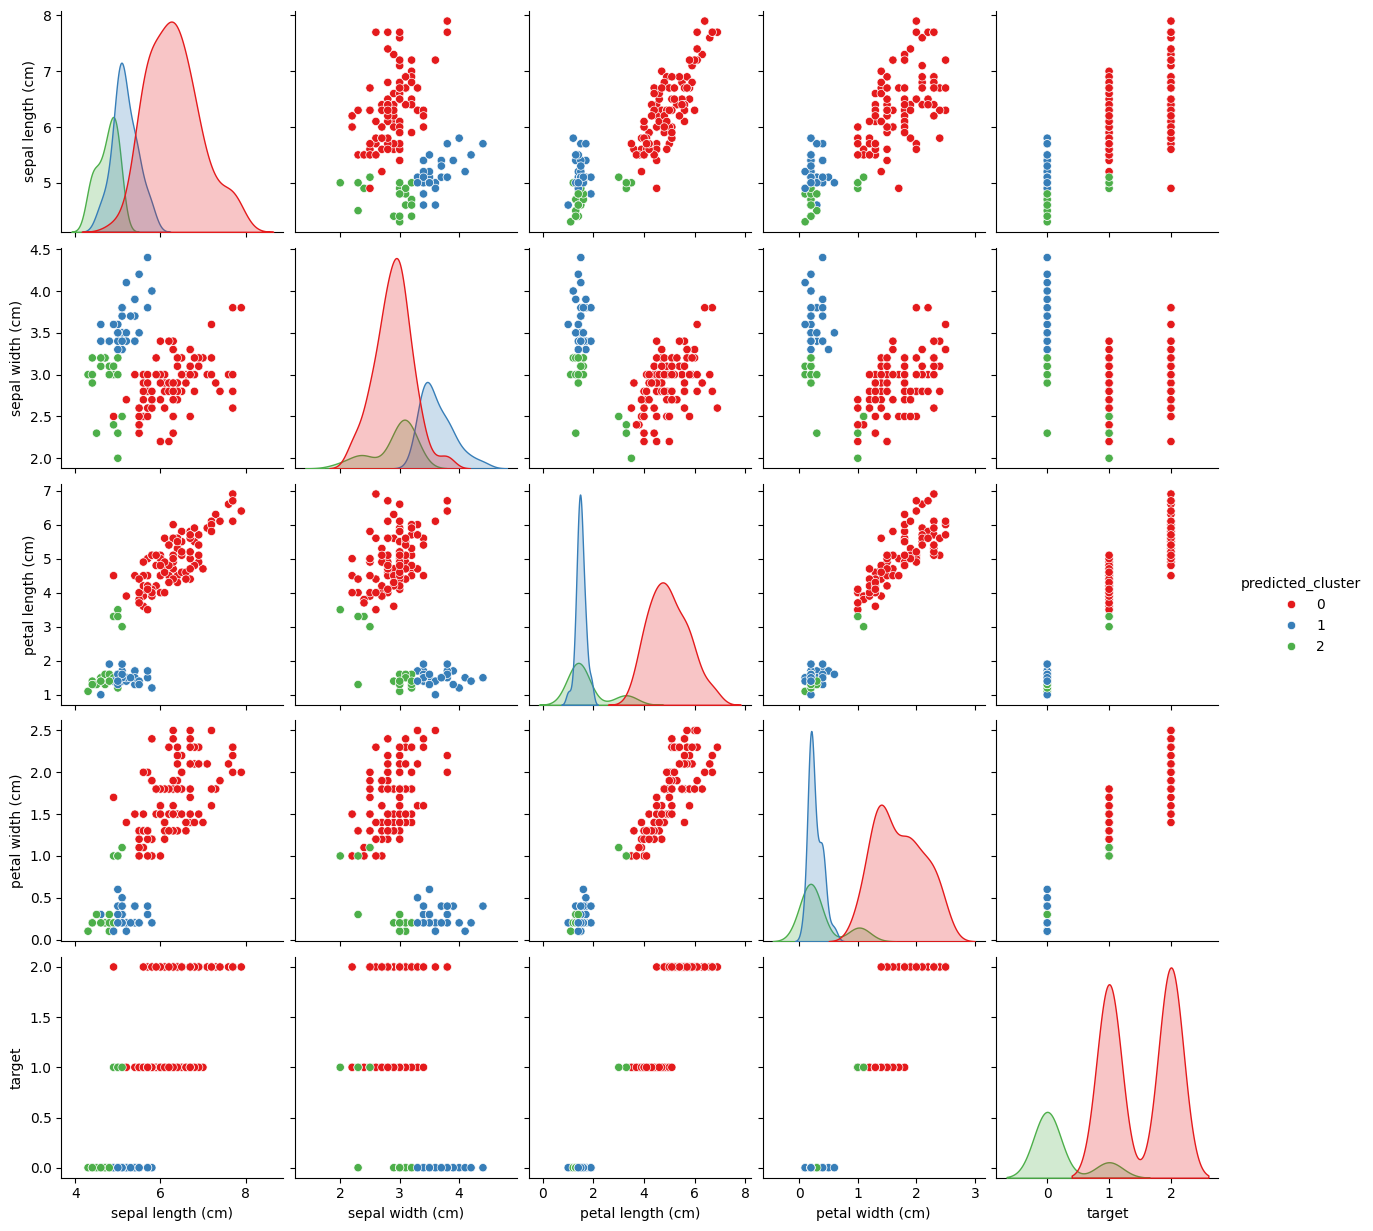

In [8]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(x_scaled)

# getting cluster centers
print("cluster-center:", kmeans.cluster_centers_)

y_predict = kmeans.predict(x_scaled)
df["predicted_cluster"]=y_predict
#visualize the data
sns.pairplot(df,hue="predicted_cluster",palette="Set1")
plt.show()

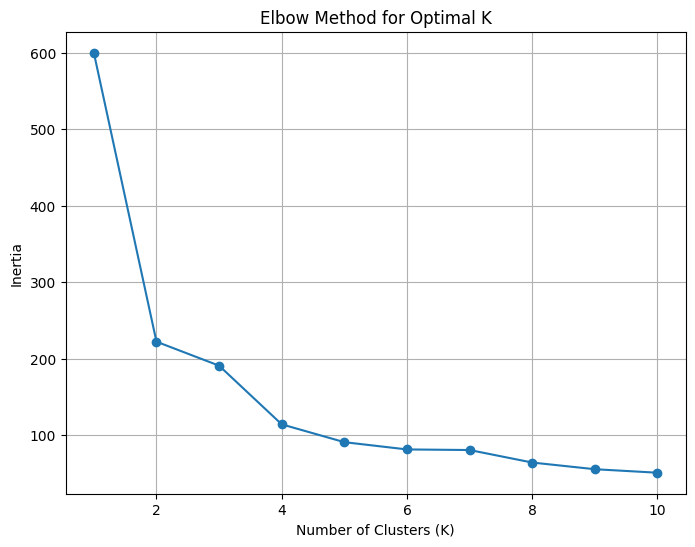

In [10]:
#hyperparameter tuning
#elbow method for optimal K
inertia=[]
k_range=range(1,11)
for k in k_range:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(x_scaled)
  inertia.append(kmeans.inertia_)

#plot the elbow graph

plt.figure(figsize=(8,6))
plt.plot(k_range,inertia,marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



In [11]:
#model evalution
from sklearn.metrics import silhouette_score,adjusted_rand_score

#silhoutte score

sil_score=silhouette_score(x_scaled,y_predict)
print("Silhouette score:",sil_score)

# Adjusting ARI
ari=adjusted_rand_score(y,y_predict)
print("Adjusted Rand Index(ARI)",ari)




Silhouette score: 0.4798814508199817
Adjusted Rand Index(ARI) 0.432804702527474
